In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:

df = pd.read_csv('laptop_data_set.csv')


C:\Users\Anuragnandan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

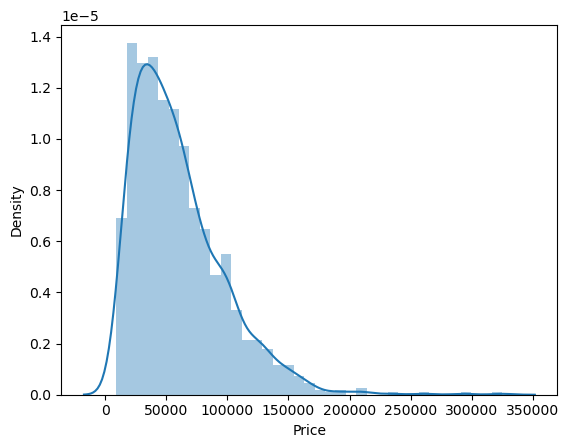

In [4]:
# seaborn
sns.distplot(df['Price'])

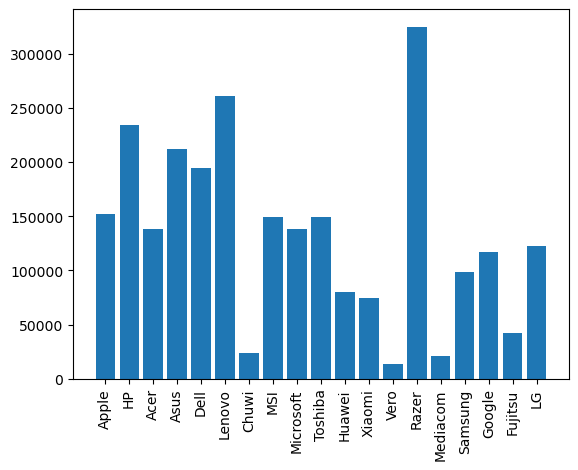

In [19]:
# matplotlib
plt.bar(df.Company,df.Price)
plt.xticks(rotation = 'vertical')
plt.show()

C:\Users\Anuragnandan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


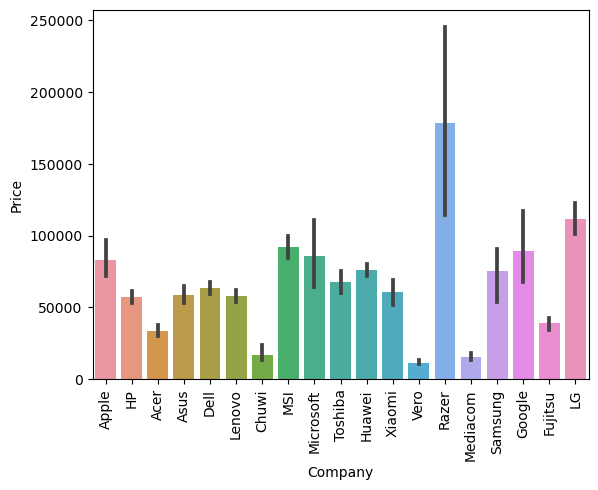

In [23]:
sns.barplot(df.Company,df.Price)
plt.xticks(rotation = 'vertical')
plt.show()

<AxesSubplot:>

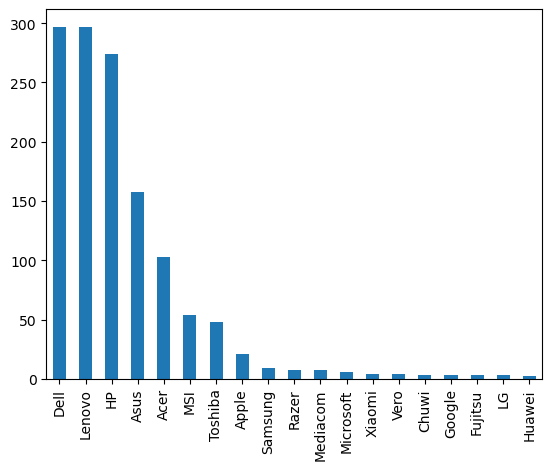

In [5]:
# seaborn
df['Company'].value_counts().plot(kind = 'bar')

In [197]:
def add_company(inpt):
    if inpt == 'Samsung' or inpt == 'Razer' or inpt == 'Mediacom' or inpt == 'Microsoft'or inpt == 'Xiaomi'or inpt == 'Vero'or inpt == 'Chuwi'or inpt == 'Google'or inpt == 'Fujitsu'or inpt == 'LG'or inpt == 'Huawei':
        return 'Other'
    else:
        return inpt
    
df['Company'] = df['Company'].apply(add_company)

<AxesSubplot:>

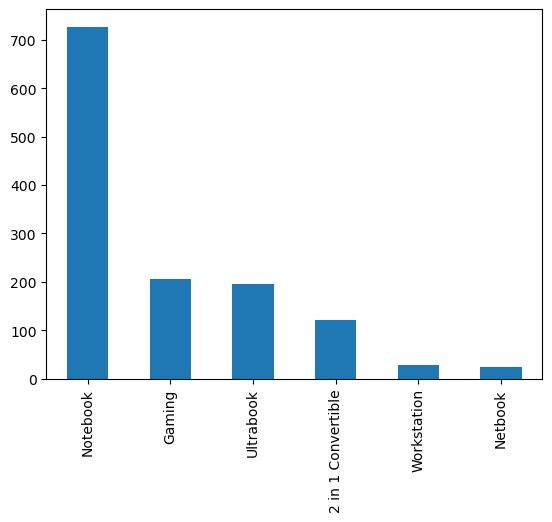

In [26]:
# seaborn
df.TypeName.value_counts().plot(kind='bar')

C:\Users\Anuragnandan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


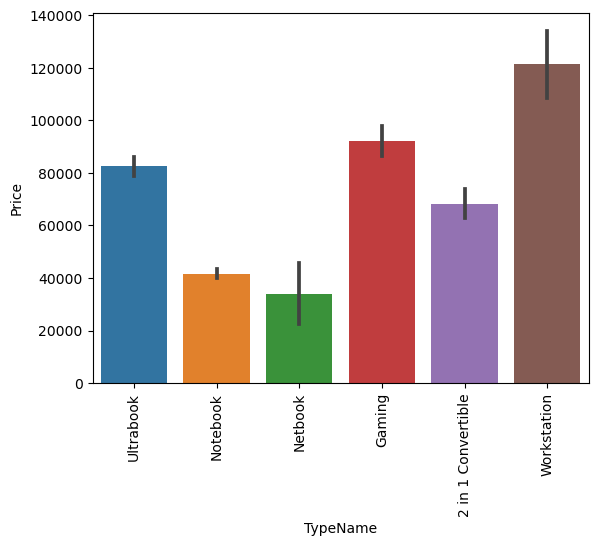

In [27]:
# seaborn
sns.barplot(df.TypeName,df.Price)
plt.xticks(rotation = 'vertical')
plt.show()

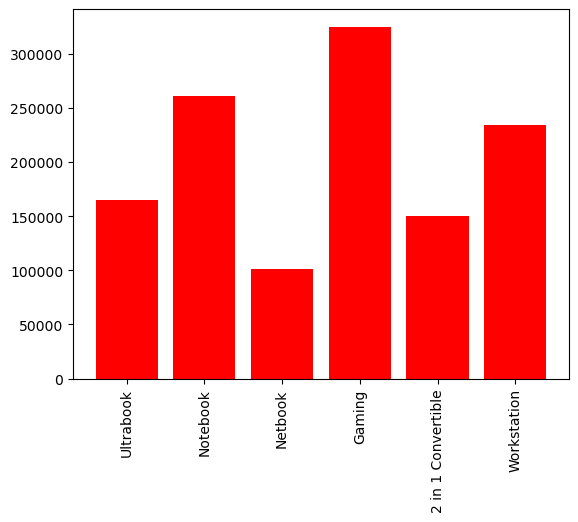

In [29]:
# matpoltlib
plt.bar(df.TypeName,df.Price , color = 'r')
plt.xticks(rotation = 'vertical')
plt.show()

In [31]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

In [32]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
new = df['ScreenResolution'].str.split('x',n=1,expand=True)
df['X_res'] = new[0]
df['Y_res'] = new[1]
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')
df.drop(columns=['ScreenResolution','Inches','X_res','Y_res'],inplace=True)


<AxesSubplot:>

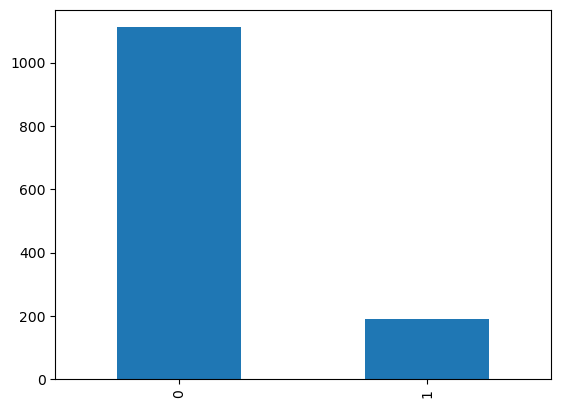

In [33]:
df.Touchscreen.value_counts().plot(kind='bar')

C:\Users\Anuragnandan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


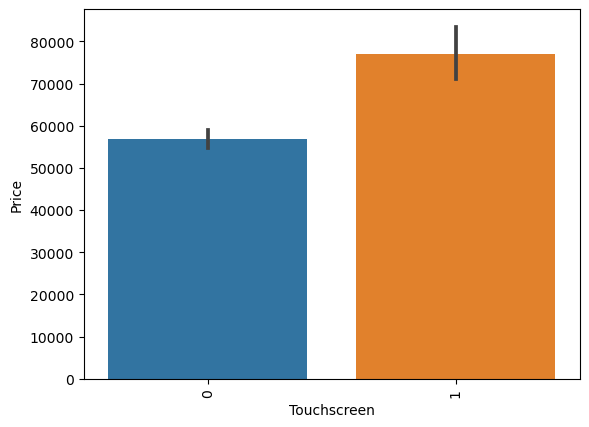

In [38]:
sns.barplot(df.Touchscreen,df.Price)
plt.xticks(rotation = 'vertical')
plt.show()

<AxesSubplot:>

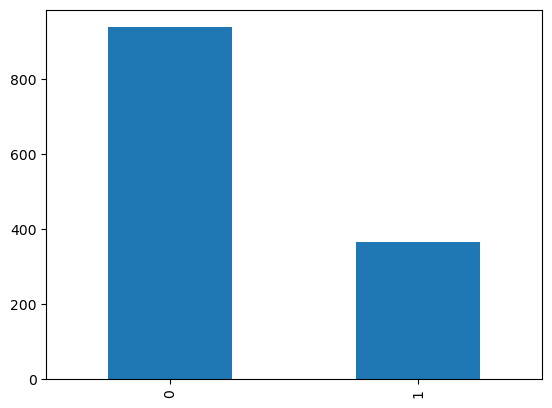

In [40]:
df.Ips.value_counts().plot(kind='bar')

C:\Users\Anuragnandan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


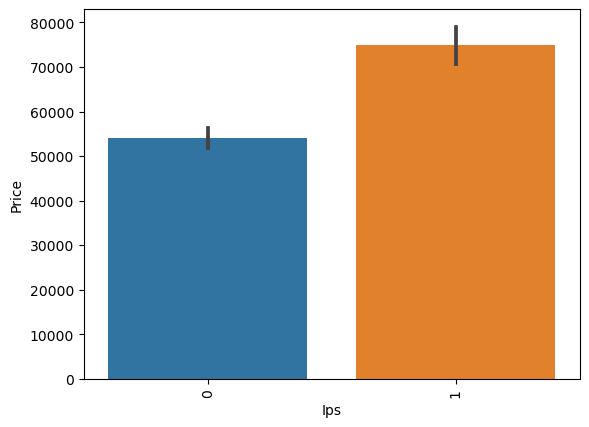

In [41]:
sns.barplot(df.Ips,df.Price)
plt.xticks(rotation = 'vertical')
plt.show()

In [44]:

df['CPU Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

def fun_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

df['CPU_Brand'] = df['CPU Name'].apply(fun_processor)

df.drop(columns=['Cpu','CPU Name'],inplace=True)

df['GPU_Brand']=df['Gpu'].apply(lambda x:x.split()[0])

df = df[df['GPU_Brand'] != 'ARM']

df.drop(columns=['Gpu'],inplace=True)

def cat_os(ip):
    if ip == 'Windows 10' or ip == 'Windows 7' or ip == 'Windows 10 S':
        return 'Windows'
    elif ip == 'macOS' or ip == 'Mac Os X':
        return 'Mac'
    else:
        return 'Others/No Os/Linux'

df['os'] = df['OpSys'].apply(cat_os)

C:\Users\Anuragnandan\AppData\Local\Temp\ipykernel_24984\1519991785.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Gpu'],inplace=True)
C:\Users\Anuragnandan\AppData\Local\Temp\ipykernel_24984\1519991785.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['os'] = df['OpSys'].apply(cat_os)


<AxesSubplot:>

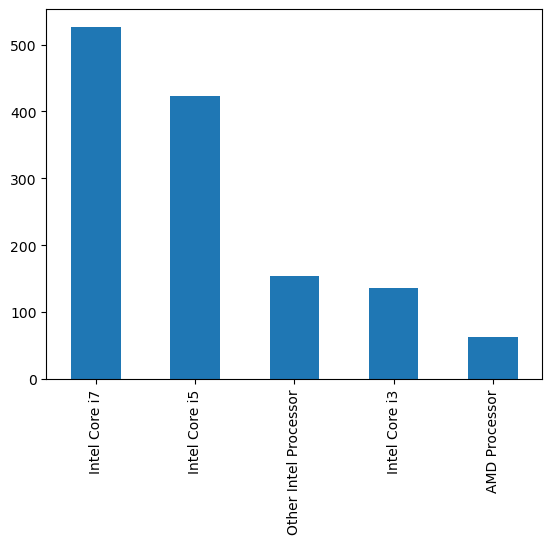

In [45]:
df.CPU_Brand.value_counts().plot(kind='bar')

C:\Users\Anuragnandan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


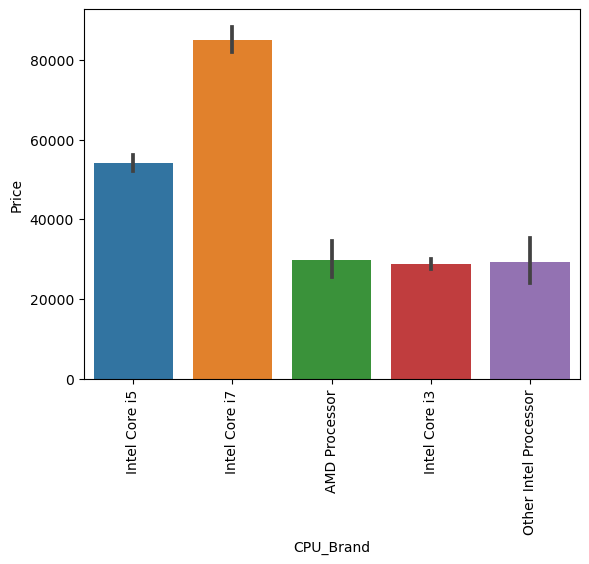

In [47]:
sns.barplot(df.CPU_Brand,df.Price)
plt.xticks(rotation = 'vertical')
plt.show()

In [201]:
df['Memory Amount'] = df.Memory.str.split(" ").apply(lambda x:x[0])
df['Memory  Type'] = df.Memory.str.split(" ").apply(lambda x:x[1])

def turn_memory_into_GB(value):
    if "GB" in value:
        return float(value[:value.find("GB")])
    elif "TB" in value:
        return float(value[:value.find("TB")]) * 1000

df['Memory Amount'] = df['Memory Amount'].apply(turn_memory_into_GB)
df.drop(columns=['Memory','OpSys'],inplace=True)


In [202]:
x ,y = df.drop('Price',axis=1),df['Price']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [203]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
df

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,CPU_Brand,GPU_Brand,os,Memory Amount,Memory Type
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel,Mac,128.0,SSD
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel,Mac,128.0,Flash
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel,Others/No Os/Linux,256.0,SSD
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,AMD,Mac,512.0,SSD
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel,Mac,256.0,SSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.8,33992.6400,1,1,157.350512,Intel Core i7,Intel,Windows,128.0,SSD
1299,Lenovo,2 in 1 Convertible,16,1.3,79866.7200,1,1,276.053530,Intel Core i7,Intel,Windows,512.0,SSD
1300,Lenovo,Notebook,2,1.5,12201.1200,0,0,111.935204,Other Intel Processor,Intel,Windows,64.0,Flash
1301,HP,Notebook,6,2.19,40705.9200,0,0,100.454670,Intel Core i7,AMD,Windows,1000.0,HDD


In [204]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False, drop='first'),[0,1,7,8,9,11])
],remainder = 'passthrough')

step2 = RandomForestRegressor(n_estimators=100, random_state=3, max_samples=0.5, max_features=0.75, max_depth=15)

                         
Pipe = Pipeline([
    ('step',step1),
    ('step2',step2)
])

Pipe.fit(x_train,y_train)

y_pred = Pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print(f'MAE :{mean_absolute_error(y_test,y_pred)}')

R2 score 0.8042798164356936
MAE :9905.897215570529
